In [65]:
from tqdm import tqdm
import pyarrow.parquet as pq
import random
import sys
from bisect import bisect_right
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from predict import *
from plot import *
importlib.reload(sys.modules['predict'])
importlib.reload(sys.modules['plot'])
from predict import *
from plot import *

In [63]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [73]:
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/Saccharomyces_cerevisiae.R64-1-1.109.gtf'

In [3]:
all_genes = {'cln2':'chrXVI:66400-67550', 'zds2': 'chrXIII:51200-52700', 'nup170':'chrII:74300-75800'}

### plot figure legend

In [43]:
(R,G,B) = colorMap(palette = 'viridis', log_scale=False)

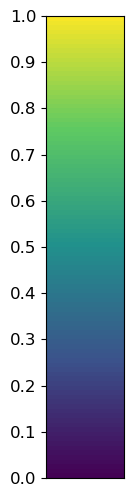

In [57]:
fig, axis = plt.subplots(figsize = (1,6))
bottom=0
y_ticks, y_tick_labels = [], []
for i in range(101):
    col=(R[i],G[i],B[i])
    rectangle = mplpatches.Rectangle([0, bottom], 1, 1, facecolor = col, linewidth = 0, alpha=1)
    axis.add_patch(rectangle)
    if i%10 == 0:
        y_ticks.append(bottom)
        y_tick_labels.append(str(i/100))
    bottom +=1
axis.set_ylim(0, 100)
axis.set_xlim(0,1)
axis.set_yticks(ticks = y_ticks, labels=y_tick_labels)
axis.set_xticks([], [])
plt.savefig(fig_outpath+f'4_mod_track_figure_legend.pdf', bbox_inches='tight')

### chromatin data

In [91]:
labels = ['240905_dorado_20190429_chrom', '240905_dorado_20210615_chrom_normalized', '240905_dorado_202205_sphe_chrom_normalized']
nuclei_chrom_1904 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240905_dorado_20190429_chrom_normalized.tsv'
nuclei_chrom_2106 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20210615_chrom_0.4.tsv'
sphe_chrom = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model.tsv'
all_chrom = [nuclei_chrom_1904, nuclei_chrom_2106, sphe_chrom]

plotting cln2 with 240905_dorado_202205_sphe_chrom_normalized ...
preprocessing input matrix...


13344it [00:12, 1038.68it/s]


number of reads before filtering: 13
number of reads kept: 13
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:21<00:00,  1.66s/it]


preprocessing input matrix...


13344it [00:09, 1415.15it/s]


number of reads before filtering: 13
number of reads kept: 13
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:17<00:00,  1.35s/it]


plotting zds2 with 240905_dorado_202205_sphe_chrom_normalized ...
preprocessing input matrix...


13344it [00:10, 1234.27it/s]


number of reads before filtering: 16
number of reads kept: 15
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_zds2_chrXIII:51200-52700.mtx
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:28<00:00,  1.87s/it]


preprocessing input matrix...


13344it [00:11, 1199.64it/s]


number of reads before filtering: 16
number of reads kept: 15
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_zds2_chrXIII:51200-52700.mtx
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:26<00:00,  1.73s/it]


plotting nup170 with 240905_dorado_202205_sphe_chrom_normalized ...
preprocessing input matrix...


13344it [00:09, 1363.02it/s]


number of reads before filtering: 13
number of reads kept: 12
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_nup170_chrII:74300-75800.mtx
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:22<00:00,  1.91s/it]


preprocessing input matrix...


13344it [00:08, 1569.49it/s]


number of reads before filtering: 13
number of reads kept: 12
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_nup170_chrII:74300-75800.mtx
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:20<00:00,  1.71s/it]


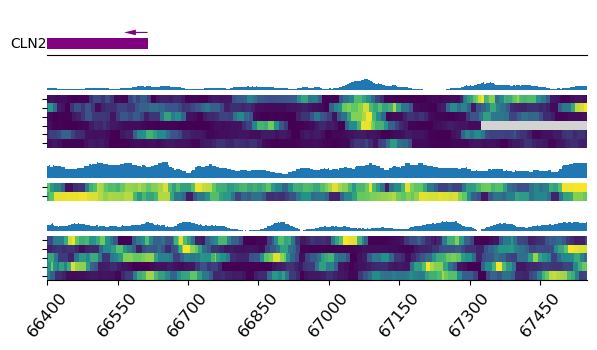

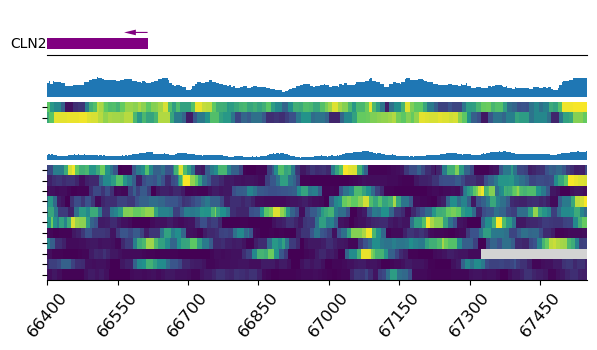

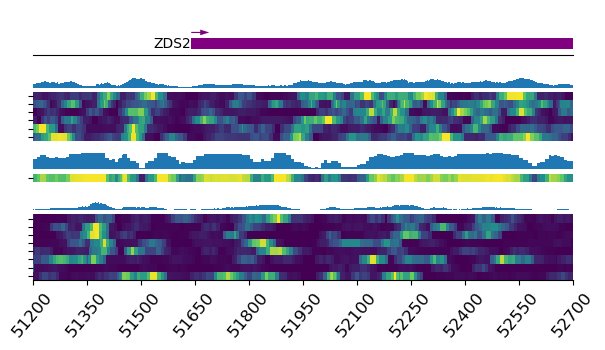

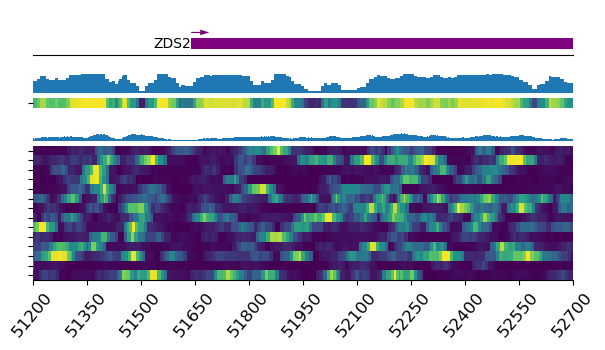

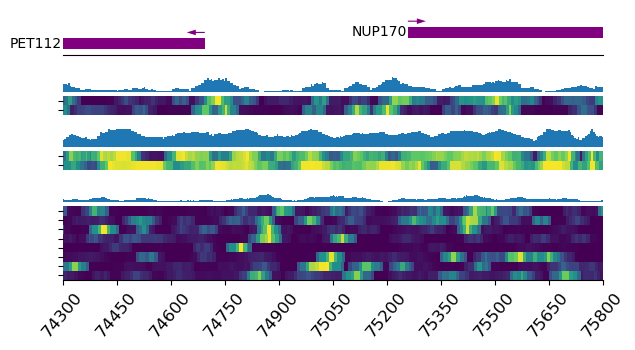

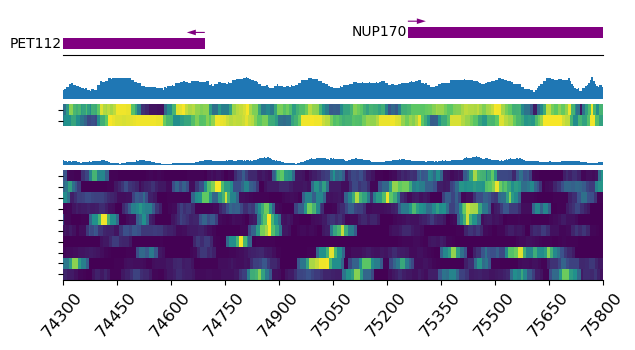

In [92]:
for geneid in all_genes:
    predfile = all_chrom[2]
    prefix = labels[2]
    print(f'plotting {geneid} with {prefix} ...')
    plotModTrack(predfile, all_genes[geneid], ncluster=3, outpath=dt_outpath, prefix= f'{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.3)
    plotModTrack(predfile, all_genes[geneid], ncluster=2, outpath=dt_outpath, prefix= f'{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.3)

In [ ]:
for geneid in all_genes:
    for i in range(len(all_chrom)):
        predfile = all_chrom[i]
        prefix = labels[i]
        print(f'plotting {geneid} with {prefix} ...')
        plotModTrack(predfile, all_genes[geneid], ncluster=3, outpath=dt_outpath, prefix= f'{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.3)
        plotModTrack(predfile, all_genes[geneid], ncluster=2, outpath=dt_outpath, prefix= f'{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.3)

plotting cln2 with ... 240905_dorado_20190429_chrom
preprocessing input matrix...


58289it [00:15, 3802.73it/s] 


number of reads before filtering: 37
number of reads kept: 28
writing output to file:  ../data/240905_dorado_20190429_chrom_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:34<00:00,  1.22s/it]


preprocessing input matrix...


58289it [00:15, 3755.81it/s] 


number of reads before filtering: 37
number of reads kept: 28
writing output to file:  ../data/240905_dorado_20190429_chrom_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it]


plotting cln2 with ... 240905_dorado_20210615_chrom_normalized
preprocessing input matrix...


522794it [00:18, 27695.16it/s]


number of reads before filtering: 80
number of reads kept: 14
writing output to file:  ../data/240905_dorado_20210615_chrom_normalized_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:18<00:00,  1.33s/it]
/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:191: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)


preprocessing input matrix...


522794it [00:17, 30329.13it/s]


number of reads before filtering: 80
number of reads kept: 14
writing output to file:  ../data/240905_dorado_20210615_chrom_normalized_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:15<00:00,  1.09s/it]


plotting cln2 with ... 240905_dorado_202205_sphe_chrom_normalized
preprocessing input matrix...


13344it [00:10, 1307.92it/s]


number of reads before filtering: 13
number of reads kept: 13
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:18<00:00,  1.39s/it]
/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:191: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)


preprocessing input matrix...


13344it [00:09, 1443.39it/s]


number of reads before filtering: 13
number of reads kept: 13
writing output to file:  ../data/240905_dorado_202205_sphe_chrom_normalized_cln2_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:17<00:00,  1.35s/it]


plotting zds2 with ... 240905_dorado_20190429_chrom
preprocessing input matrix...


58289it [00:13, 4170.93it/s] 


number of reads before filtering: 28
number of reads kept: 21
writing output to file:  ../data/240905_dorado_20190429_chrom_zds2_chrXIII:51200-52700.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:30<00:00,  1.46s/it]


preprocessing input matrix...


58289it [00:13, 4224.04it/s] 


number of reads before filtering: 28
number of reads kept: 21
writing output to file:  ../data/240905_dorado_20190429_chrom_zds2_chrXIII:51200-52700.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


 90%|█████████████████████████████████████████████████████████████████████████████████████████▌         | 19/21 [00:26<00:02,  1.42s/it]

In [88]:
nuclei_chrom_2106_cln2 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240915_dorado_20210615_chrom_cln2.tsv'
nuclei_chrom_2106_zds2 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240915_dorado_20210615_chrom_zds2.tsv'
nuclei_chrom_2106_nup170 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240915_dorado_20210615_chrom_nup170.tsv'

In [93]:
chrom_2106 = {'cln2': nuclei_chrom_2106_cln2, 'zds2': nuclei_chrom_2106_zds2, 'nup170': nuclei_chrom_2106_nup170}

processing file: /private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240915_dorado_20210615_chrom_cln2.tsv
preprocessing input matrix...


198it [00:00, 1031.94it/s]


number of reads before filtering: 198
number of reads kept: 62
writing output to file:  ../data/240917_dorado_20210615_chrom_normalized_nup170_chrXVI:66400-67550.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [01:16<00:00,  1.23s/it]


preprocessing input matrix...


198it [00:00, 1341.95it/s]

number of reads before filtering: 198
number of reads kept: 62
writing output to file:  ../data/240917_dorado_20210615_chrom_normalized_nup170_chrXVI:66400-67550.mtx


nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [01:10<00:00,  1.14s/it]


processing file: /private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240915_dorado_20210615_chrom_zds2.tsv
preprocessing input matrix...


252it [00:00, 1192.43it/s]


number of reads before filtering: 251
number of reads kept: 41
writing output to file:  ../data/240917_dorado_20210615_chrom_normalized_nup170_chrXIII:51200-52700.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:58<00:00,  1.42s/it]
/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:191: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)


preprocessing input matrix...


252it [00:00, 1261.92it/s]


number of reads before filtering: 251
number of reads kept: 41
writing output to file:  ../data/240917_dorado_20210615_chrom_normalized_nup170_chrXIII:51200-52700.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:59<00:00,  1.45s/it]


processing file: /private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240915_dorado_20210615_chrom_nup170.tsv
preprocessing input matrix...


205it [00:00, 996.42it/s]


number of reads before filtering: 204
number of reads kept: 35
writing output to file:  ../data/240917_dorado_20210615_chrom_normalized_nup170_chrII:74300-75800.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 3
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:47<00:00,  1.35s/it]
/private/groups/brookslab/gabai/tools/NEMO/src/plot.py:191: RuntimeWarning: invalid value encountered in divide
  aggregate = np.divide(np.divide(count, total), 256)


preprocessing input matrix...


205it [00:00, 1046.22it/s]


number of reads before filtering: 204
number of reads kept: 35
writing output to file:  ../data/240917_dorado_20210615_chrom_normalized_nup170_chrII:74300-75800.mtx
nan in output matrix!
running hierarchical clustering...
Clustering with number of clusters = 2
plotting gene annotations...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:54<00:00,  1.55s/it]


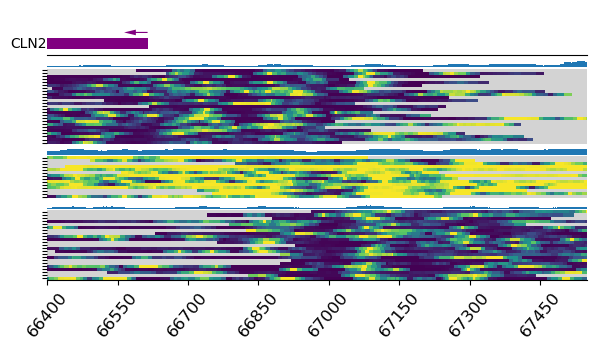

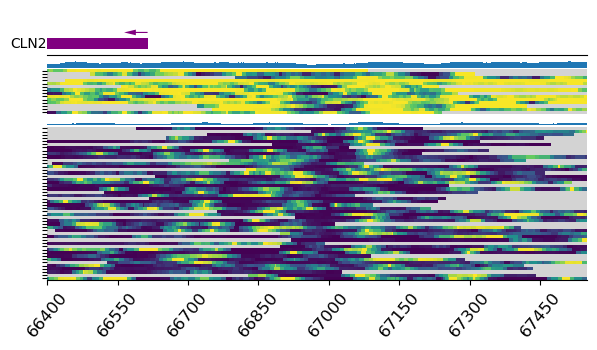

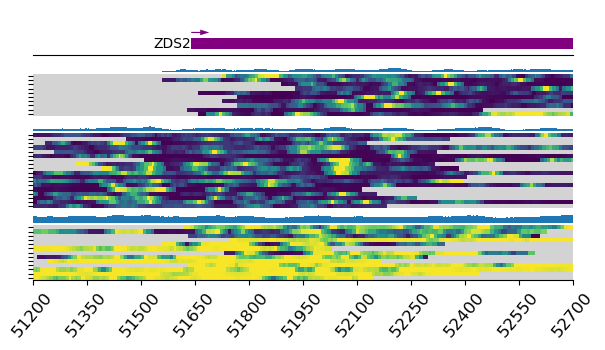

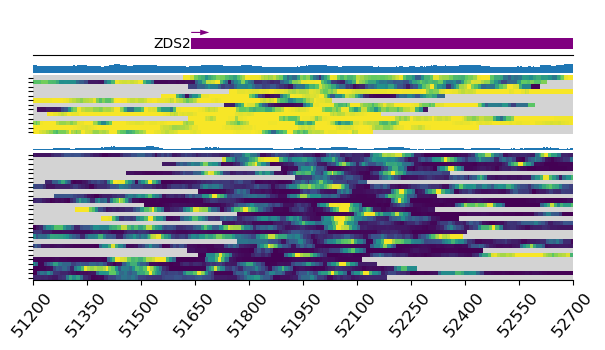

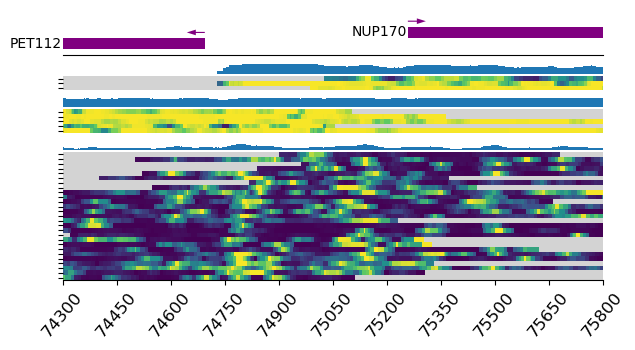

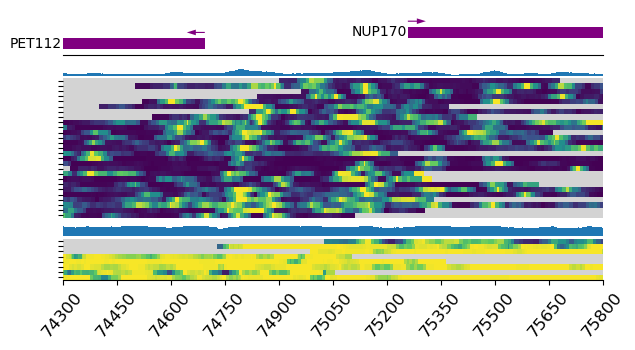

In [101]:
prefix = '240917_dorado_20210615_chrom_normalized'
for gene in all_genes:
    print(f'processing file: {chrom_2106[gene]}')
    plotModTrack(chrom_2106[gene], all_genes[gene], ncluster=3, outpath=dt_outpath, prefix= f'{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.5)
    plotModTrack(chrom_2106[gene], all_genes[gene], ncluster=2, outpath=dt_outpath, prefix= f'{prefix}_{geneid}', gtfFile=gtfFile, xticks_space = 150, na_thred=0.5)